In [2]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math

In [3]:
def list_range(low, high_exclusive, increment = 1):
    arr = []
    for x in range(low, high_exclusive, increment):
        arr.append(x)
    return arr

In [4]:
def read_csv(path):
    rows = []
    with open(path) as file:
        reader = csv.reader(file)
        for row in reader:
            rows.append(row)
    return rows

In [5]:
# Adds column_x and column_y of a [[][]] array
def add_columns(array, from_row, column_x, column_y):
    added_columns = []
    index = from_row;
    for i in range(from_row, len(array)):
        added_columns.append(int(array[i][0])+int(array[i][1]))
    return added_columns

In [6]:
# Constructs new list where each usccessive series of items_per_bucket items have been added and places into succesive entries 
def compress(values, items_per_bucket):
    new_values = []
    bucket = 0
    items_in_bucket = 0
    for i in range(len(values)):
        bucket += values[i]
        items_in_bucket += 1
        if items_in_bucket == items_per_bucket:
            new_values.append(bucket)
            bucket = 0
            items_in_bucket = 0
    return new_values

In [7]:
def compress_average(values, items_per_bucket):
    new_values = []
    bucket = 0
    items_in_bucket = 0
    for i in range(len(values)):
        bucket += values[i]
        items_in_bucket += 1
        if items_in_bucket == items_per_bucket:
            new_values.append(bucket/items_per_bucket)
            bucket = 0
            items_in_bucket = 0
    #if bucket != 0:
    #    new_values.append(bucket/items_per_bucket)
    return new_values

In [8]:
def read_dijkstra_tree_and_traversal_data(path):
    data = [[][]]
    rows = read_csv(path)
    x_index = 0
    for row in rows[1:]:
        data[x_index].append(row)
    return data

SyntaxError: invalid syntax (<ipython-input-8-b46d06de436d>, line 2)

In [9]:
def timings_of_dijkstra_and_inner_loop_total(path, compress_factor = 1000):
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    # naming
    plt.xlabel('loop iteration number')
    plt.ylabel('loop iteration time')
    plt.title(file_name)
    # show
    plt.show()

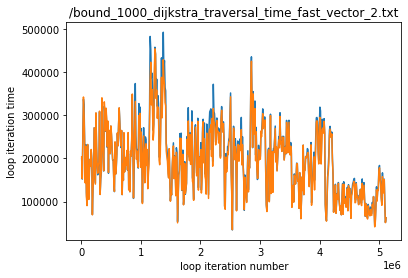

In [11]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_numbers = [1,2]
compress_factor = 100
for i in file_numbers:
    file_name = "/bound_1000_dijkstra_traversal_time_fast_vector_"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

In [38]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_numbers = [1]
bounds = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
compress_factor = 1000
first_pass = True
sum_with_fast = 0
for b in bounds:
    for i in file_numbers:
        file_name = "/bound_"+str(b)+"_dijkstra_traversal_time_fast_vector_"+str(i)+".txt"
        path = folder_path + file_name
        data = read_csv(path)
        # make list with sum of dijkstra time and traversal time
        y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
        sum_with_fast += sum(y_dijkstra_and_traversal)

        
print(sum_with_fast/(10**6))
print(sum_with_fast/(10**6)/(60))
print(sum_with_fast/(10**6)/(60)/(60))
sum_with_fast

2108.817146
35.14695243333333
0.5857825405555556


2108817146

In [37]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources"
file_numbers = [1]
bounds = [50, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
compress_factor = 1000
first_pass = True
sum_without_fast = 0
for b in bounds:
    for i in file_numbers:
        file_name = "/104953bound_"+str(b)+"_dijkstra_traversal_time_without_fast_vector.txt"
        path = folder_path + file_name
        data = read_csv(path)
        # make list with sum of dijkstra time and traversal time
        y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
        sum_without_fast += sum(y_dijkstra_and_traversal)
print(sum_without_fast/(10**6))
print(sum_without_fast/(10**6)/(60))
print(sum_without_fast/(10**6)/(60)/60)
sum_without_fast

2374.123553
39.56872588333333
0.6594787647222221


2374123553

In [36]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources"
file_numbers = [1]
bounds = [50, 100, 150, 250, 400, 800, 1000, 1800]
compress_factor = 1000
first_pass = True
sum_with_initialization_and_copying = 0
for b in bounds:
    for i in file_numbers:
        file_name = "/malta_dijkstra_traversal_time_with_initialization_and_copying"+str(b)+".txt"
        path = folder_path + file_name
        data = read_csv(path)
        # make list with sum of dijkstra time and traversal time
        y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
        sum_with_initialization_and_copying += sum(y_dijkstra_and_traversal)
print(sum_with_initialization_and_copying/(10**6))
print(sum_with_initialization_and_copying/(10**6)/(60))
print(sum_with_initialization_and_copying/(10**6)/(60)/60)
sum_with_initialization_and_copying

3113.731524
51.8955254
0.8649254233333333


3113731524

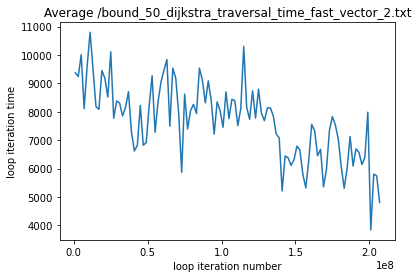

In [22]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_numbers = [1,2]
bounds = [50]#, 100, 150, 250, 400, 800, 1000, 1800, 2800, 4600, 7400, 12000]
compress_factor = 1000
first_pass = True
for b in bounds:
    for i in file_numbers:
        file_name = "/bound_"+str(b)+"_dijkstra_traversal_time_fast_vector_"+str(i)+".txt"
        path = folder_path + file_name
        data = read_csv(path)
        # make list with sum of dijkstra time and traversal time
        y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
        # make x-values
        x_dijkstra_and_traversal = []
        for i in range(len(y_dijkstra_and_traversal)):
            x_dijkstra_and_traversal.append(i)
        # compress
        if first_pass:
            first_pass = False
            x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
            y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
        else:
            x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
            y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

    
plt.plot(x_aggregate, y_aggregate)
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title("Average "+file_name)
# show
plt.show()

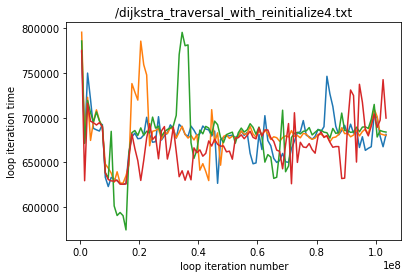

In [113]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

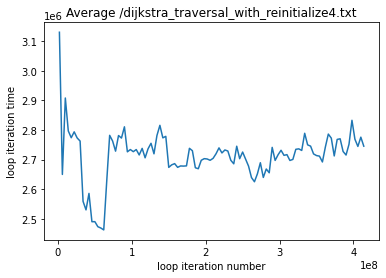

In [119]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
plt.plot(x_aggregate, y_aggregate)
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title("Average "+file_name)
# show
plt.show()

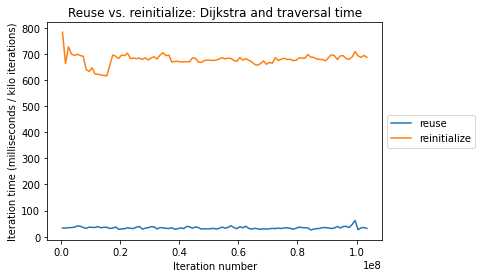

In [46]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
y_aggregate = [x/(4*1000) for x in y_aggregate]    
plt.plot(x_aggregate, y_aggregate, label = "reuse")


first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
y_aggregate = [x/(4*1000) for x in y_aggregate]
plt.plot(x_aggregate, y_aggregate, label = "reinitialize")
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title("Reuse vs. reinitialize: Dijkstra and traversal time")
# show
plt.show()

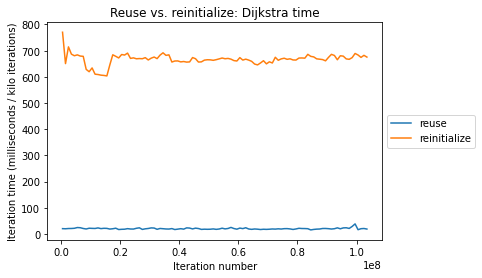

In [45]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
row_index = 0
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
y_aggregate = [x/(4*1000) for x in y_aggregate]
    
plt.plot(x_aggregate, y_aggregate, label = "reuse")


first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
y_aggregate = [x/(4*1000) for x in y_aggregate]
    
plt.plot(x_aggregate, y_aggregate, label = "reinitialize")
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title("Reuse vs. reinitialize: Dijkstra time")
# show
plt.show()

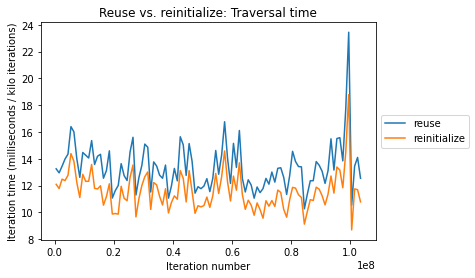

In [43]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
row_index = 1
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
y_aggregate = [x/(1000*4) for x in y_aggregate]    
plt.plot(x_aggregate, y_aggregate, label = "reuse")


first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

x_aggregate = [x/4 for x in x_aggregate]
y_aggregate = [x/(1000*4) for x in y_aggregate]
plt.plot(x_aggregate, y_aggregate, label = "reinitialize")
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title("Reuse vs. reinitialize: Traversal time")
# show
plt.show()

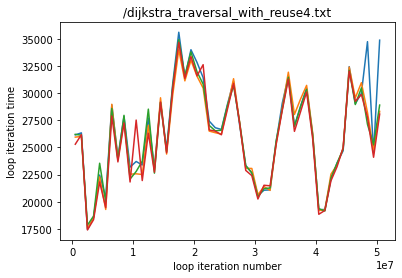

In [114]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

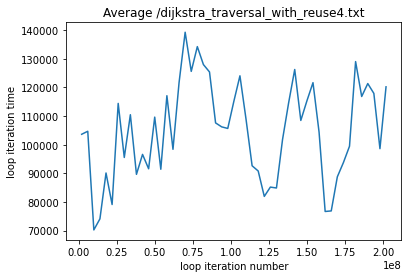

In [120]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

    
plt.plot(x_aggregate, y_aggregate)
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title("Average "+file_name)
# show
plt.show()

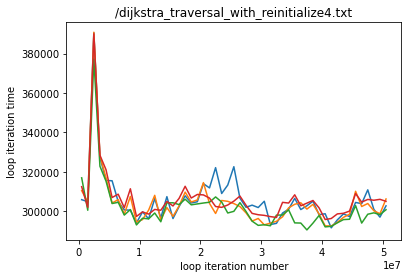

In [115]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

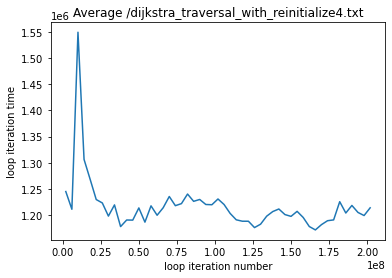

In [121]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

    
plt.plot(x_aggregate, y_aggregate)
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title("Average "+file_name)
# show
plt.show()

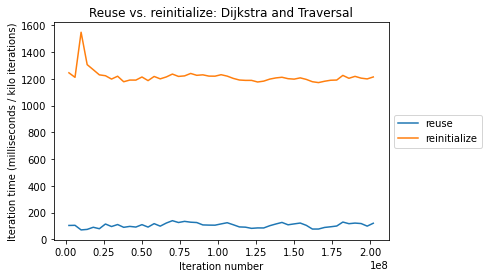

In [14]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

y_aggregate = [x/(1000) for x in y_aggregate]     
plt.plot(x_aggregate, y_aggregate, label = "reuse")


first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

y_aggregate = [x/(1000) for x in y_aggregate]      
plt.plot(x_aggregate, y_aggregate, label = "reinitialize")
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title("Reuse vs. reinitialize: Dijkstra and Traversal")
# show
plt.show()

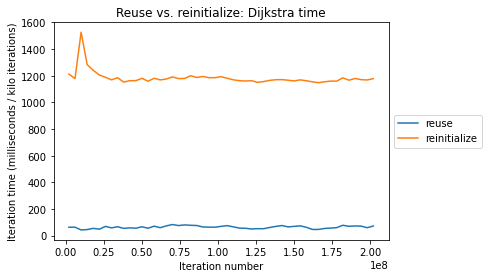

In [15]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
row_index = 0
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

y_aggregate = [x/(1000) for x in y_aggregate]     
plt.plot(x_aggregate, y_aggregate, label = "reuse")


first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

y_aggregate = [x/(1000) for x in y_aggregate]     
plt.plot(x_aggregate, y_aggregate, label = "reinitialize")
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title("Reuse vs. reinitialize: Dijkstra time")
# show
plt.show()

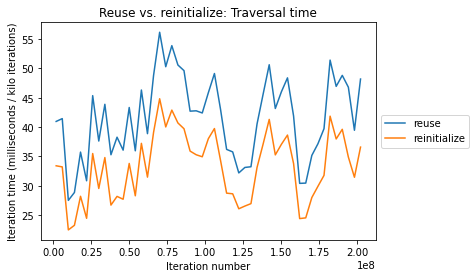

In [16]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
row_index = 1
file_numbers = [1,2,3,4]
compress_factor = 1000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

y_aggregate = [x/(1000) for x in y_aggregate]     
plt.plot(x_aggregate, y_aggregate, label = "reuse")


first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with dijkstra time
    y_dijkstra_and_traversal = [int(data[i][row_index]) for i in range(1, len(data))]
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

y_aggregate = [x/(1000) for x in y_aggregate]     
plt.plot(x_aggregate, y_aggregate, label = "reinitialize")
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title("Reuse vs. reinitialize: Traversal time")
# show
plt.show()

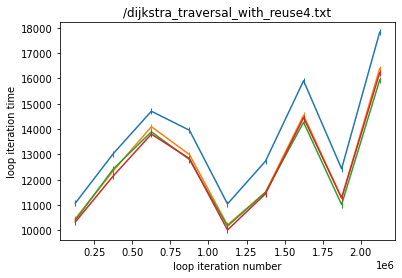

In [8]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 500
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)[:5000]
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, marker='|')
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

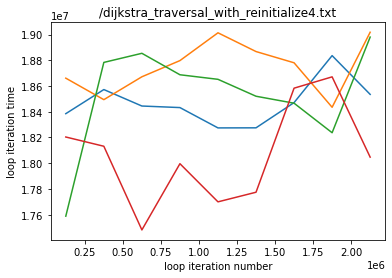

In [156]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 500
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)[:5000]
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

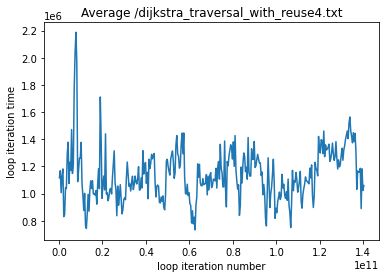

In [124]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 10000
first_pass = True
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reuse"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    if first_pass:
        first_pass = False
        x_aggregate = compress(x_dijkstra_and_traversal, compress_factor)
        y_aggregate = compress(y_dijkstra_and_traversal, compress_factor)
    else:
        x_aggregate = [a + b for a, b in zip(compress(x_dijkstra_and_traversal, compress_factor), x_aggregate)]
        y_aggregate = [a + b for a, b in zip(compress(y_dijkstra_and_traversal, compress_factor), y_aggregate)]

    
plt.plot(x_aggregate, y_aggregate)
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title("Average "+file_name)
# show
plt.show()

In [ ]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_numbers = [1,2,3,4]
compress_factor = 100
for i in file_numbers:
    file_name = "/dijkstra_traversal_with_reinitialize"+str(i)+".txt"
    path = folder_path + file_name
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    # make x-values
    x_dijkstra_and_traversal = []
    for i in range(len(y_dijkstra_and_traversal)):
        x_dijkstra_and_traversal.append(i)
    # compress
    x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
    y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
    # input to plot
    plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
    
# naming
plt.xlabel('loop iteration number')
plt.ylabel('loop iteration time')
plt.title(file_name)
# show
plt.show()

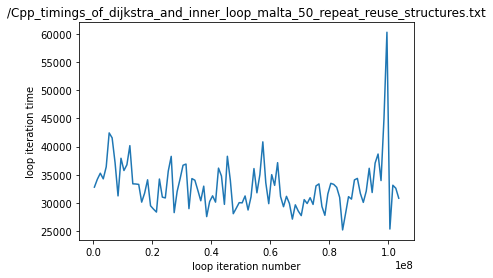

In [91]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_malta_50_repeat_reuse_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

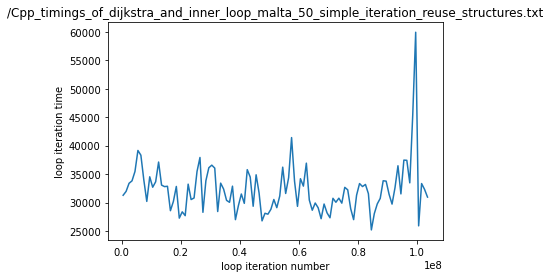

In [93]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_malta_50_simple_iteration_reuse_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

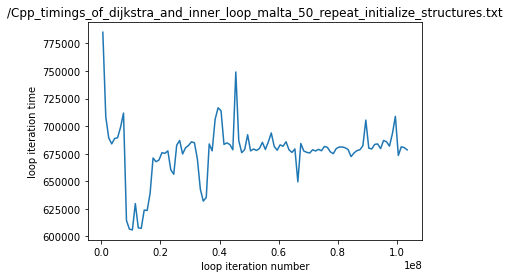

In [94]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_malta_50_repeat_initialize_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

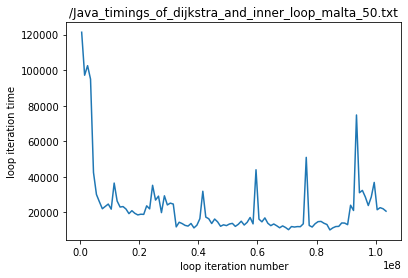

In [95]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_malta_50.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

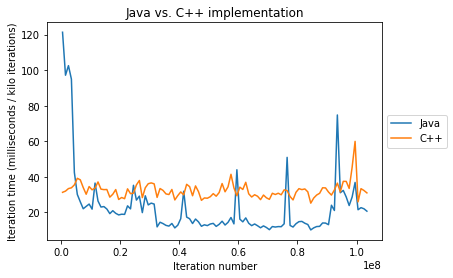

In [21]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_malta_50.txt"
path = folder_path+file_name
compress_factor = 1000
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)

y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal,label='Java')



file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_malta_50_simple_iteration_reuse_structures.txt"
path = folder_path+file_name
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)

y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++')



# naming
# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title('Java vs. C++ implementation')
# show
plt.show()

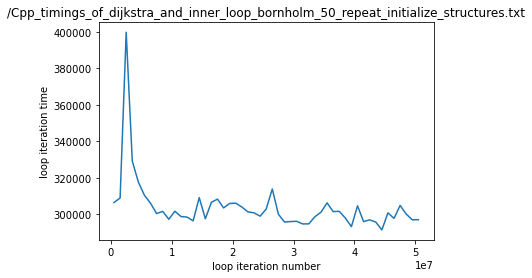

In [96]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_bornholm_50_repeat_initialize_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

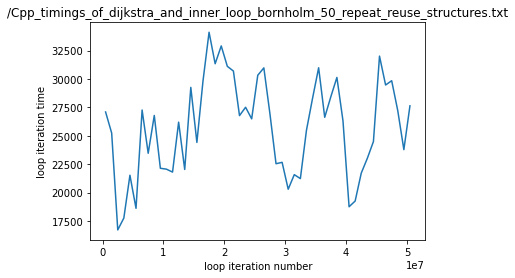

In [97]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_bornholm_50_repeat_reuse_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

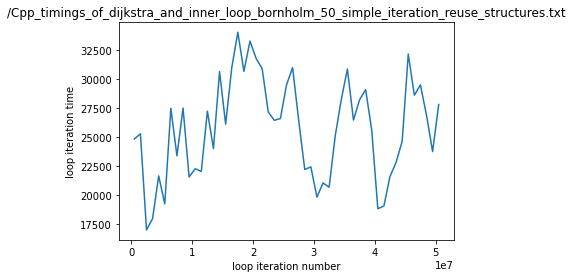

In [98]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_bornholm_50_simple_iteration_reuse_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

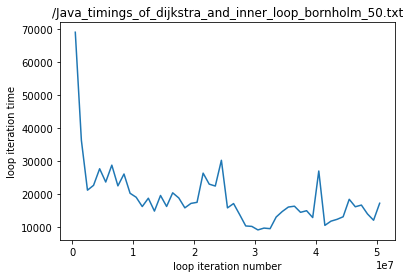

In [99]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_bornholm_50.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name)

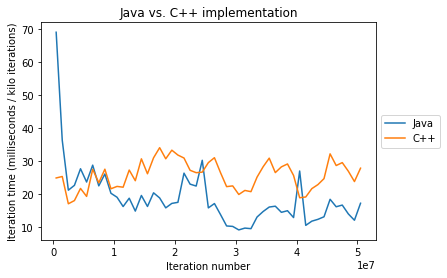

In [23]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/bornholm/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_bornholm_50.txt"
path = folder_path+file_name
compress_factor = 1000
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal,label='Java')



file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_bornholm_50_simple_iteration_reuse_structures.txt"
path = folder_path+file_name
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++')


# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (milliseconds / kilo iterations)')
plt.title('Java vs. C++ implementation')
# show
plt.show()

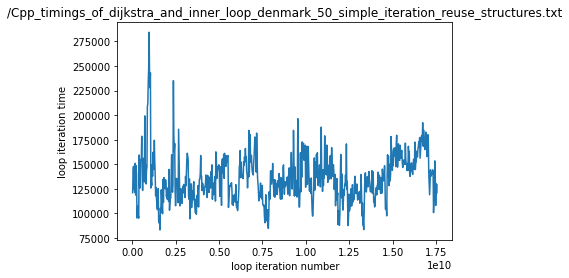

In [110]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Cpp_timings_of_dijkstra_and_inner_loop_denmark_50_simple_iteration_reuse_structures.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name, 5000)

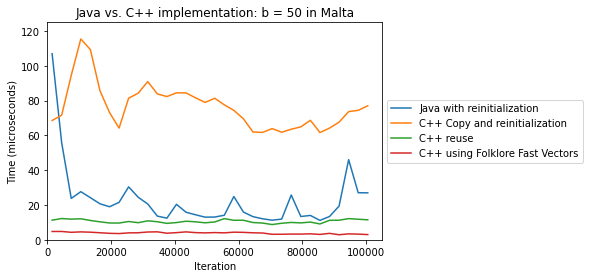

In [48]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_malta_50.txt"
path = folder_path+file_name
compress_factor = 3000
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal,label='Java with reinitialization')


path = "C:/Users/sx5/CLionProjects/ATB/resources/malta_dijkstra_traversal_time_with_initialization_and_copying50.txt"
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++ Copy and reinitialization')


path = "C:/Users/sx5/CLionProjects/ATB/resources//104953bound_50_dijkstra_traversal_time_without_fast_vector.txt"
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++ reuse')

file_name = "/bound_50_dijkstra_traversal_time_fast_vector_1.txt"
path = folder_path+file_name
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++ using Folklore Fast Vectors')


# Set top axes

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.xlim(0, 105000)
plt.ylim(0, 125)
plt.xlabel('Iteration')
plt.ylabel('Time (microseconds)')
plt.title('Java vs. C++ implementation: b = 50 in Malta')
# show
plt.show()



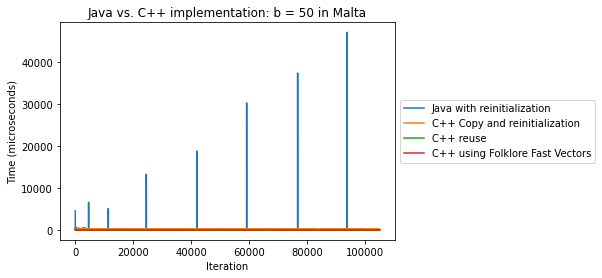

In [50]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_malta_50.txt"
path = folder_path+file_name
compress_factor = 1
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal,label='Java with reinitialization')


path = "C:/Users/sx5/CLionProjects/ATB/resources/malta_dijkstra_traversal_time_with_initialization_and_copying50.txt"
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++ Copy and reinitialization')


path = "C:/Users/sx5/CLionProjects/ATB/resources//104953bound_50_dijkstra_traversal_time_without_fast_vector.txt"
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++ reuse')

file_name = "/bound_50_dijkstra_traversal_time_fast_vector_1.txt"
path = folder_path+file_name
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress_average(x_dijkstra_and_traversal, compress_factor)
#x_dijkstra_and_traversal = [x/compress_factor for x in x_dijkstra_and_traversal]
y_dijkstra_and_traversal = compress_average(y_dijkstra_and_traversal, compress_factor)
#y_dijkstra_and_traversal = [x/(1000) for x in y_dijkstra_and_traversal] 
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal, label='C++ using Folklore Fast Vectors')


# Set top axes

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.xlim(0, 105000)
#plt.ylim(0, 125)
plt.xlabel('Iteration')
plt.ylabel('Time (microseconds)')
plt.title('Java vs. C++ implementation: b = 50 in Malta')
# show
plt.show()


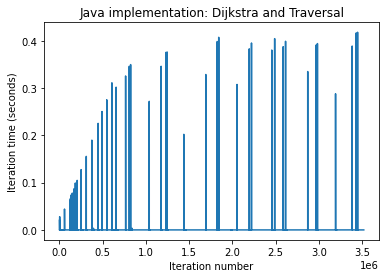

In [31]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_denmark_50.txt"

path = folder_path+file_name
compress_factor = 1
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = [x/(10**6) for x in y_dijkstra_and_traversal]
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (seconds)')
plt.title('Java implementation: Dijkstra and Traversal')
# show
plt.show()

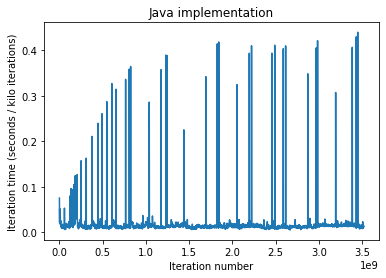

In [28]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_denmark_50.txt"

path = folder_path+file_name
compress_factor = 1000
data = read_csv(path)
# make list with sum of dijkstra time and traversal time
y_dijkstra_and_traversal = add_columns(data, 1, 0, 1)
# make x-values
x_dijkstra_and_traversal = []
for i in range(len(y_dijkstra_and_traversal)):
    x_dijkstra_and_traversal.append(i)
# compress
x_dijkstra_and_traversal = compress(x_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = compress(y_dijkstra_and_traversal, compress_factor)
y_dijkstra_and_traversal = [x/(10**6) for x in y_dijkstra_and_traversal]
# input to plot
plt.plot(x_dijkstra_and_traversal, y_dijkstra_and_traversal)
# naming
plt.xlabel('Iteration number')
plt.ylabel('Iteration time (seconds / kilo iterations)')
plt.title('Java implementation')
# show
plt.show()

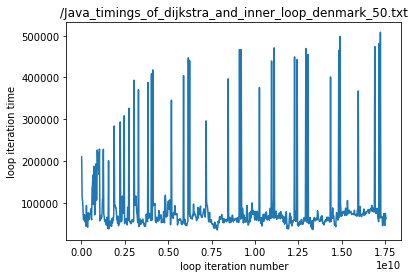

In [104]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_denmark_50.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name, 5000)

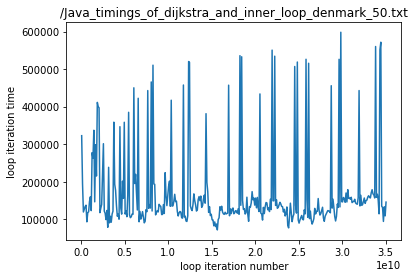

In [105]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_denmark_50.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name, 10000)

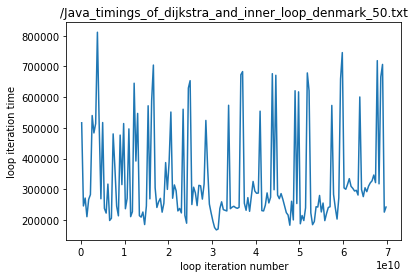

In [107]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_denmark_50.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name, 20000)

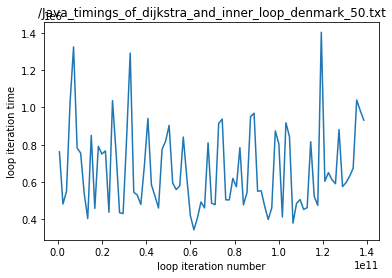

In [108]:
folder_path = "C:/Users/sx5/CLionProjects/ATB/resources/denmark/running time in dijkstra and inner loop"
file_name = "/Java_timings_of_dijkstra_and_inner_loop_denmark_50.txt"
timings_of_dijkstra_and_inner_loop_total(folder_path+file_name, 40000)

16727
16741


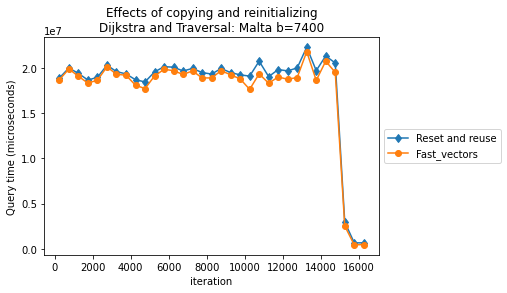

In [16]:
folder_path_resources = "C:/Users/sx5/CLionProjects/ATB/resources"
folder_path_malte_running = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
compress_factor = 500
bounds = [7400]

#file_fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"

# Slow version
#first_pass = True
#for bound in bounds:
#    file_slow = "/malta_dijkstra_traversal_time_with_initialization_and_copying"+str(bound)+".txt"
#    path = folder_path_resources+file_slow
#    data = read_csv(path)
#    print(len(data))
#    # make list with sum of dijkstra time and traversal time
#    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
#    if first_pass:
#        y = dijkstra_and_traversal
#    for i in range(len(y)):
#        y[i] += dijkstra_and_traversal[i]

# make x-values
#x = list_range(0, len(y))

#y = compress(y, compress_factor)
#x = compress(x, compress_factor)
#x = [x/compress_factor for x in x]
#plt.plot(x, y, label='Copy and reinitialize', marker = '|')

# Reuse version without fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/104953bound_"+str(bound)+"_dijkstra_traversal_time_without_fast_vector.txt"
    path = folder_path_resources+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
x = [x/compress_factor for x in x]
plt.plot(x, y, label='Reset and reuse', marker = 'd')


# Reuse with fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"
    path = folder_path_malte_running+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
x = [x/compress_factor for x in x]
plt.plot(x, y, label='Fast_vectors', marker = 'o') # Also no map

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Query time (microseconds)')
plt.title('Effects of copying and reinitializing\nDijkstra and Traversal: Malta b='+str(bounds[0]))
# show
plt.show()

104953
104870
104954


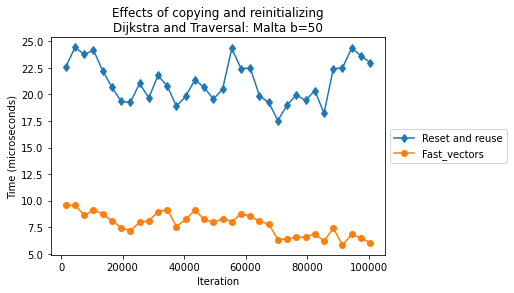

In [54]:
folder_path_resources = "C:/Users/sx5/CLionProjects/ATB/resources"
folder_path_malte_running = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
compress_factor = 3000
bounds = [50]

#file_fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"

# Slow version
first_pass = True
for bound in bounds:
    file_slow = "/malta_dijkstra_traversal_time_with_initialization_and_copying"+str(bound)+".txt"
    path = folder_path_resources+file_slow
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress_average(y, compress_factor)
x = compress_average(x, compress_factor)
#x = [x/compress_factor for x in x]
#plt.plot(x, y, label='Copy and reinitialize', marker = '|')

# Reuse version without fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/104953bound_"+str(bound)+"_dijkstra_traversal_time_without_fast_vector.txt"
    path = folder_path_resources+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress_average(y, compress_factor)
x = compress_average(x, compress_factor)
#x = [x/compress_factor for x in x]
plt.plot(x, y, label='Reset and reuse', marker = 'd')


# Reuse with fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"
    path = folder_path_malte_running+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress_average(y, compress_factor)
x = compress_average(x, compress_factor)
#x = [x/compress_factor for x in x]
plt.plot(x, y, label='Fast_vectors', marker = 'o') # Also no map

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Time (microseconds)')
plt.title('Effects of copying and reinitializing\nDijkstra and Traversal: Malta b=50')
# show
plt.show()

16727
16741


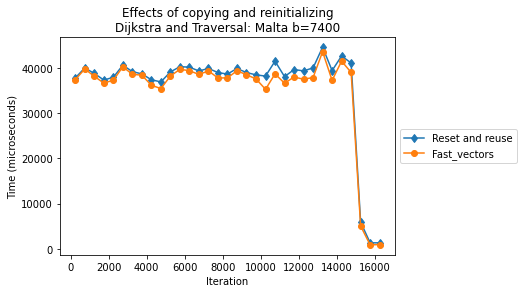

In [22]:
folder_path_resources = "C:/Users/sx5/CLionProjects/ATB/resources"
folder_path_malte_running = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
compress_factor = 500
bounds = [7400]

#file_fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"

# Slow version
first_pass = True
#for bound in bounds:
#    file_slow = "/malta_dijkstra_traversal_time_with_initialization_and_copying"+str(bound)+".txt"
#    path = folder_path_resources+file_slow
#    data = read_csv(path)
#    print(len(data))
    # make list with sum of dijkstra time and traversal time
#    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
#    if first_pass:
#        y = dijkstra_and_traversal
#    for i in range(len(y)):
#        y[i] += dijkstra_and_traversal[i]

# make x-values
#x = list_range(0, len(y))

#y = compress_average(y, compress_factor)
#x = compress_average(x, compress_factor)
#x = [x/compress_factor for x in x]
#plt.plot(x, y, label='Copy and reinitialize', marker = '|')

# Reuse version without fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/104953bound_"+str(bound)+"_dijkstra_traversal_time_without_fast_vector.txt"
    path = folder_path_resources+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress_average(y, compress_factor)
x = compress_average(x, compress_factor)
#x = [x/compress_factor for x in x]
plt.plot(x, y, label='Reset and reuse', marker = 'd')


# Reuse with fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"
    path = folder_path_malte_running+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress_average(y, compress_factor)
x = compress_average(x, compress_factor)
#x = [x/compress_factor for x in x]
plt.plot(x, y, label='Fast_vectors', marker = 'o') # Also no map

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Time (microseconds)')
plt.title('Effects of copying and reinitializing\nDijkstra and Traversal: Malta b='+str(bounds[0]))
# show
plt.show()

47172
47175
47175


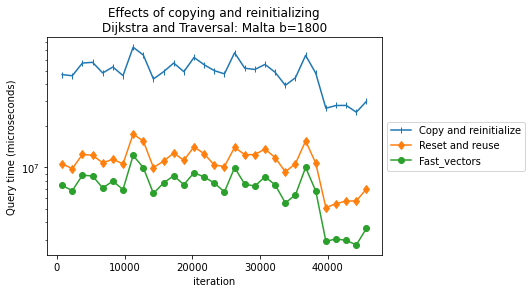

In [32]:
folder_path_resources = "C:/Users/sx5/CLionProjects/ATB/resources"
folder_path_malte_running = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
compress_factor = 1500
bounds = [1800]



#file_fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"

# Slow version
first_pass = True
for bound in bounds:
    file_slow = "/malta_dijkstra_traversal_time_with_initialization_and_copying"+str(bound)+".txt"
    path = folder_path_resources+file_slow
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra = []
    for elem in data[1:]:
        dijkstra.append(int(elem[0]))
    if first_pass:
        y = dijkstra
    for i in range(len(y)):
        y[i] += dijkstra[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
x = [x/compress_factor for x in x]
plt.plot(x, y, label='Copy and reinitialize', marker = '|')

# Reuse version without fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/104953bound_"+str(bound)+"_dijkstra_traversal_time_without_fast_vector.txt"
    path = folder_path_resources+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra = []
    for elem in data[1:]:
        dijkstra.append(int(elem[0]))
    if first_pass:
        y = dijkstra
    for i in range(len(y)):
        y[i] += dijkstra[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
x = [x/compress_factor for x in x]
plt.plot(x, y, label='Reset and reuse', marker = 'd')


# Reuse with fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"
    path = folder_path_malte_running+file_reuse_without_Fast_vector
    data = read_csv(path)
    print(len(data))
    # make list with sum of dijkstra time and traversal time
    dijkstra = []
    for elem in data[1:]:
        dijkstra.append(int(elem[0]))
    if first_pass:
        y = dijkstra
    for i in range(len(y)):
        y[i] += dijkstra[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
x = [x/compress_factor for x in x]
plt.plot(x, y, label='Fast_vectors', marker = 'o') # Also no map

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Query time (microseconds)')
plt.title('Effects of copying and reinitializing\nDijkstra and Traversal: Malta b=1800')
# show
plt.show()

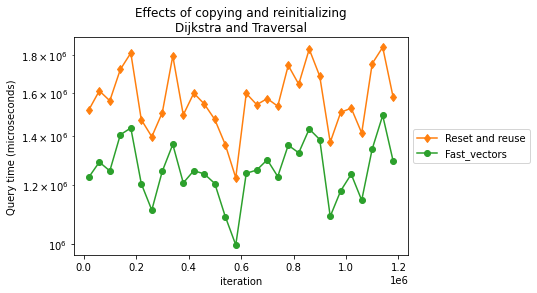

In [71]:
folder_path_resources = "C:/Users/sx5/CLionProjects/ATB/resources"
folder_path_malte_running = "C:/Users/sx5/CLionProjects/ATB/resources/malta/running time in dijkstra and inner loop"
compress_factor = 200
bounds = [12000]

file_fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"

# Reuse version without fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/104953bound_"+str(bound)+"_dijkstra_traversal_time_without_fast_vector.txt"
    path = folder_path_resources+file_reuse_without_Fast_vector
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
plt.plot(x, y, label='Reset and reuse', marker = 'd', color='tab:orange')


# Reuse with fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/bound_"+str(bound)+"_dijkstra_traversal_time_fast_vector_1.txt"
    path = folder_path_malte_running+file_reuse_without_Fast_vector
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))

y = compress(y, compress_factor)
x = compress(x, compress_factor)
plt.plot(x, y, label='Fast_vectors', marker = 'o', color='tab:green') # Also no map

# Show legends
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# naming
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('Query time (microseconds)')
plt.title('Effects of copying and reinitializing\nDijkstra and Traversal')
# show
plt.show()

In [ ]:
# Reuse version without fast-vectors
first_pass = True
for bound in bounds:
    file_reuse_without_Fast_vector = "/104953bound_"+str(bound)+"_dijkstra_traversal_time_without_fast_vector.txt"
    path = folder_path_resources+file_slow
    data = read_csv(path)
    # make list with sum of dijkstra time and traversal time
    dijkstra_and_traversal = add_columns(data, 1, 0, 1)
    if first_pass:
        y = dijkstra_and_traversal
    for i in range(len(y)):
        y[i] += dijkstra_and_traversal[i]

# make x-values
x = list_range(0, len(y))
plt.plot(x, y, label='Reset and reuse')